In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
url = "https://heartdisease4.s3.us-east-2.amazonaws.com/heart.csv"

df = pd.read_csv(url)

In [3]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139      0      0.2   
12    49    1   1       130   266    0        1      171      0      0.6   
13    64    1   3       110   211    0        0      144      1      1.8   
14    58    0   3       150   283    1        0      162      0      1.0   
15    50    0   2       120   219    0        1      158      0      1.6   
16    58    0   2       120   340    0        1      172      0      0.0   
17    66    0   3       150   226    0        1      114      0      2.6   
18    43    1   0       150   247    0        1      171      0      1.5   
19    69    0   3       140   239    0        1      151      0      1.8   
20    59    1   0       135   234    0        1      161      0      0.5   
21    44    1   2       130   233    0        1      179      1      0.4   
22    42    1   0       140   226    0        1      178      0      0.0   
23    61    1   2       150   243    1        1      137      1      1.0   
24    40    1   3       140   199    0        1      178      1      1.4   
25    71    0   1       160   302    0        1      162      0      0.4   
26    59    1   2       150   212    1        1      157      0      1.6   
27    51    1   2       110   175    0        1      123      0      0.6   
28    65    0   2       140   417    1        0      157      0      0.8   
29    53    1   2       130   197    1        0      152      0      1.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
273   58    1   0       100   234    0        1      156      0      0.1   
274   47    1   0       110   275    0        0      118      1      1.0   
275   52    1   0       125   212    0        1      168      0      1.0   
276   58    1   0       146   218    0        1      105      0      2.0   
277   57    1   1       124   261    0        1      141      0      0.3   
278   58    0   1       136   319    1        0      152      0      0.0   
279   61    1   0       138   166    0        0      125      1      3.6   
280   42    1   0       136   315    0        1      125      1      1.8   
281   52    1   0       128   204    1        1      156      1      1.0   
282   59    1   2       126   218    1        1      134      0      2.2   
283   40    1   0       152   223    0        1      181      0      0.0   
284   61    1   0       140   207    0        0      138      1      1.9   
285   46    1   0       140   311    0        1      120      1      1.8   
286   59    1   3       134   204    0        1      162      0      0.8   
287   57    1   1       154   232    0        0      164      0      0.0   
288   57    1   0       110   335    0        1      143      1      3.0   
289   55    0   0       128   205    0        2      130      1      2.0   
290   61    1   0       148   203    0        1      161      0      0.0   
291   58    1   0       114   318    0        2      140      0      4.4   
292   58    0   0       170   225    1        0      146      1      2.8   
293   67    1   2       152   212    0        0      

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr)
plt.show()

<Figure size 1600x1400 with 2 Axes>

In [5]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [6]:
#RECODING
df['sex'] = df['sex'].replace(0, 'Female')
df['sex'] = df['sex'].replace(1, 'Male')

## RENAME AFTER RE-CODING

In [7]:
clean_df = df.rename(columns={
    'age': 'Age',
    'sex': 'Gender',
    'cp': 'Chest Pain Type',
    'trestbps': 'Resting Blood Pressure (mmHg)',
    'chol': 'Serum Cholestorol (mg/dl)',
    'fbs': 'Fasting Blood Sugar > 120 mg/dl',
    'restecg': 'Resting Electrocardiographic Results',
    'thalach': 'Maximum Heart Rate Achieved',
    'exang': 'Exercise Induced Angina',
    'oldpeak': 'ST Depression (induced by exercise relative to rest)',
    'slope': 'Slope of the Peak Exercise ST Segment',
    'ca': 'Vessels Colored by Fluoroscopy',
    'thal': 'Thal',
    'target': 'Diagnosis of Heart Disease (Angiographic Disease Status)'
})

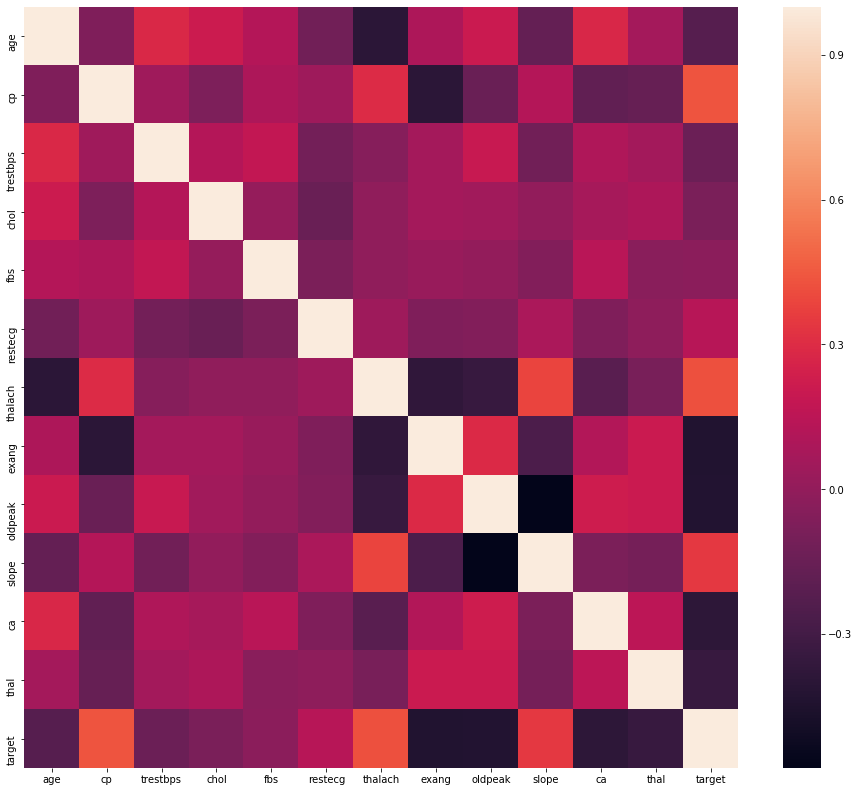

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr)
plt.show()